Bank Deposit UCI Dataset Exercise - Customer Deposit Predictive Analysis

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statistics as stats
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE

# scatter plot matrix
from pandas.tools.plotting import scatter_matrix

%matplotlib inline

#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC

In [2]:
# Load dataset
# url = 'https://github.com/lin-meng/dsipy/blob/master/bank-full.csv'
BankDs = pd.read_csv('C:\\Users\\Meng\\OneDrive\\Documents\\tamu\\DataScience\\bank\\bank-full.csv', sep=';', na_values=['.'])

In [3]:
# shape
print(BankDs.shape) 

(45211, 17)


In [4]:
# head
print(BankDs.head(10))

   age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may     

In [5]:
# add "Yes" column: 1 represents made a deposit, 0 represents did not make a deposit
BankDs['Yes'] = (BankDs.y =='yes').astype(int)

In [6]:
# check the null value in the dataset
BankDs.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
Yes          0
dtype: int64

In [7]:
# Dataset Info
BankDs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
Yes          45211 non-null int32
dtypes: int32(1), int64(7), object(10)
memory usage: 6.0+ MB


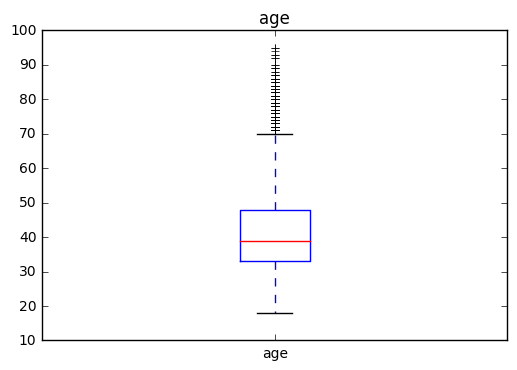

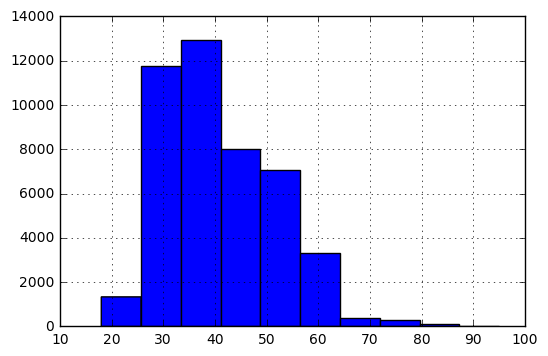

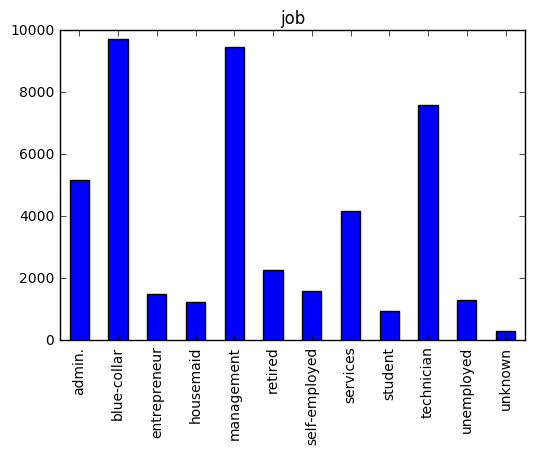

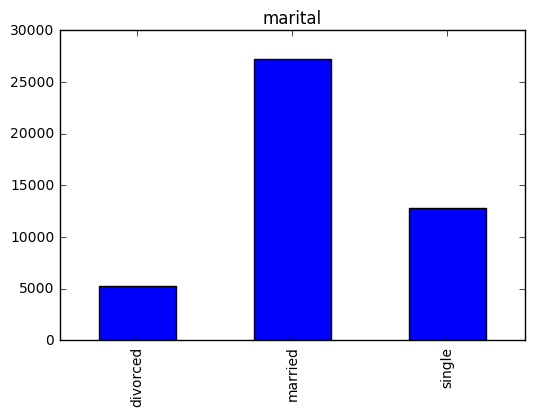

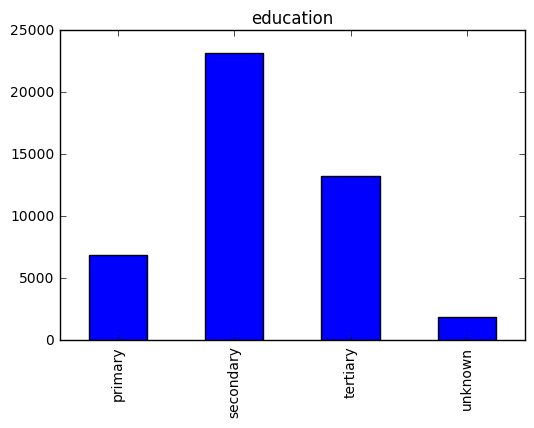

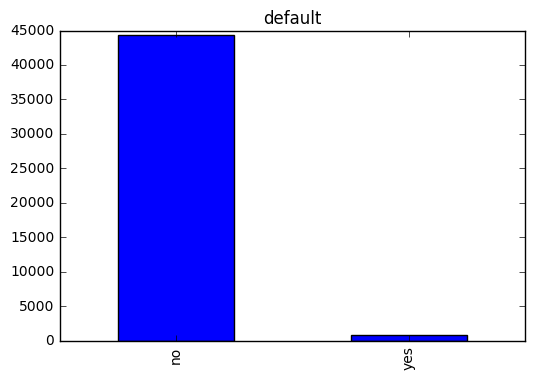

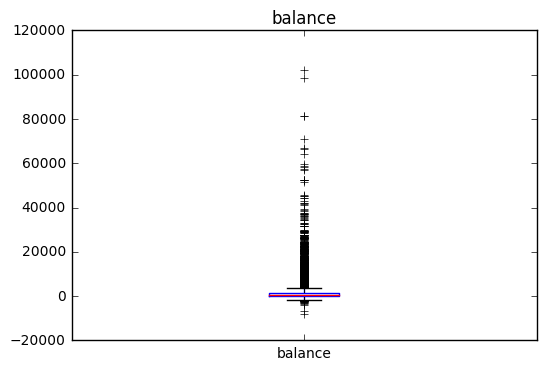

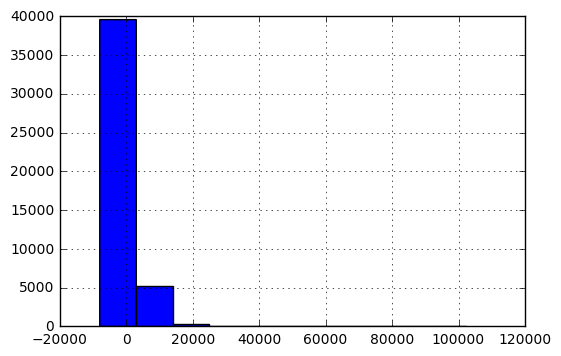

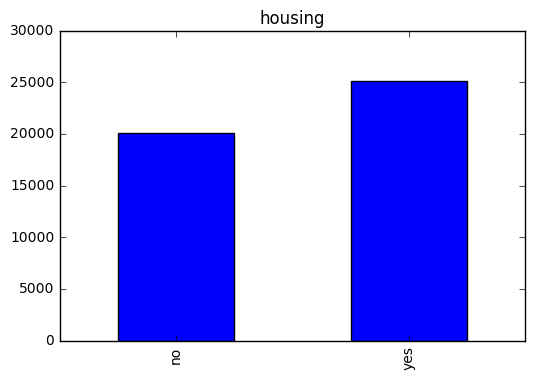

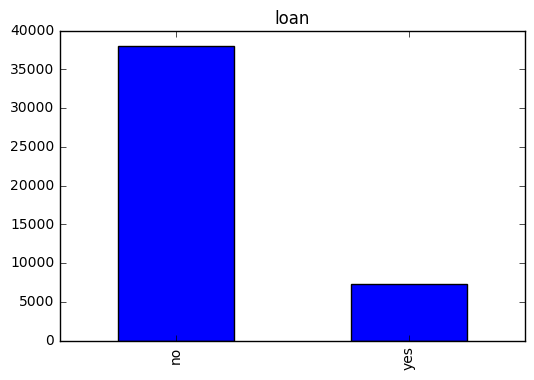

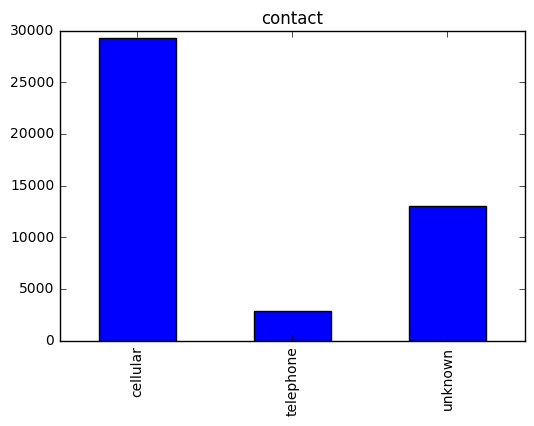

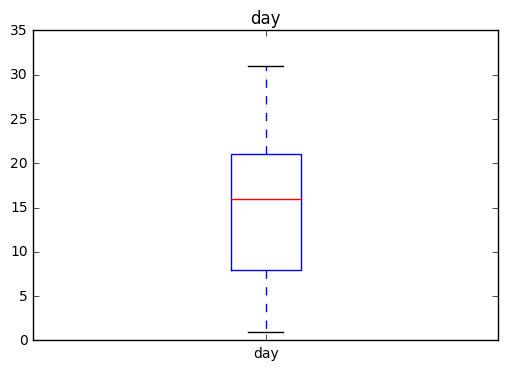

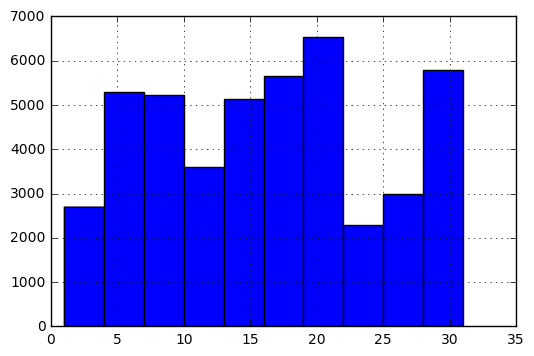

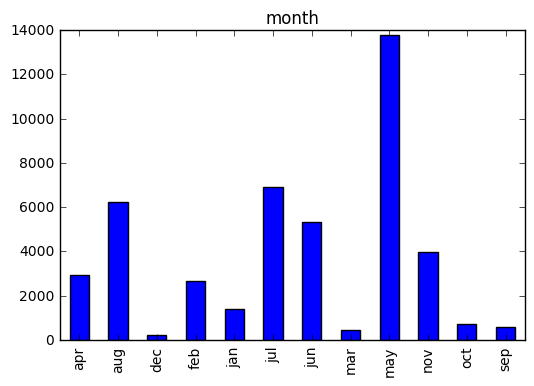

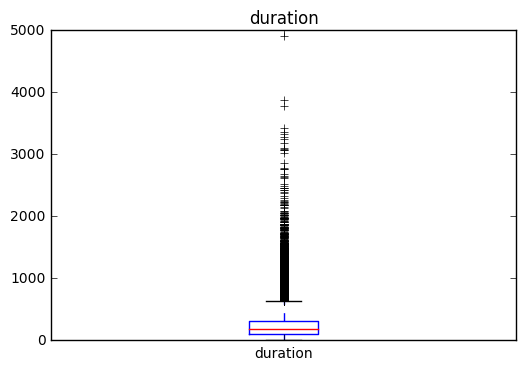

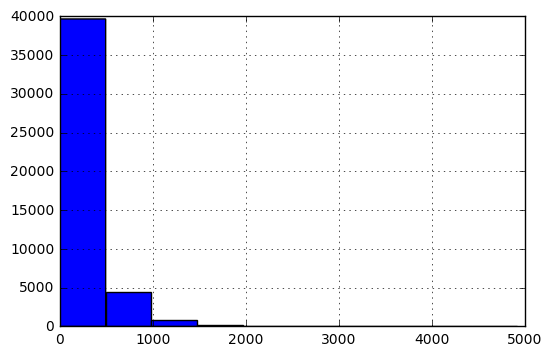

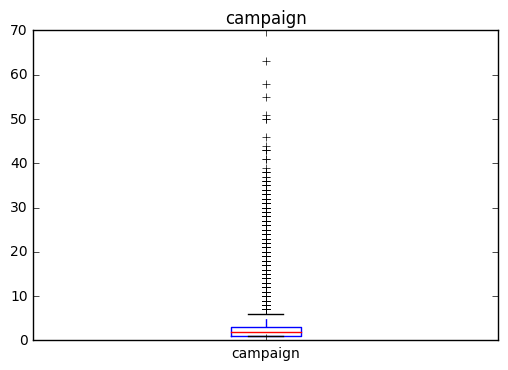

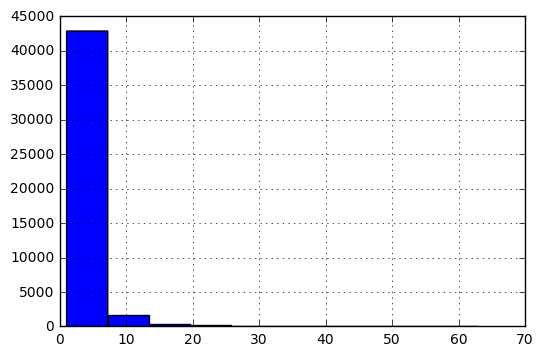

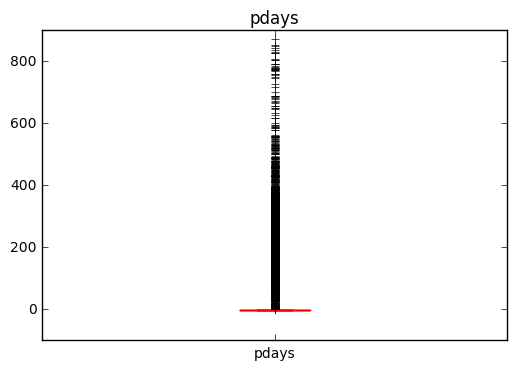

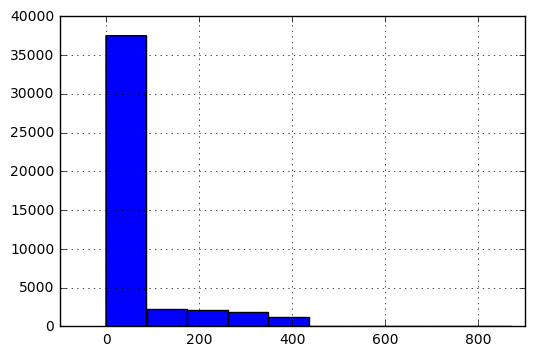

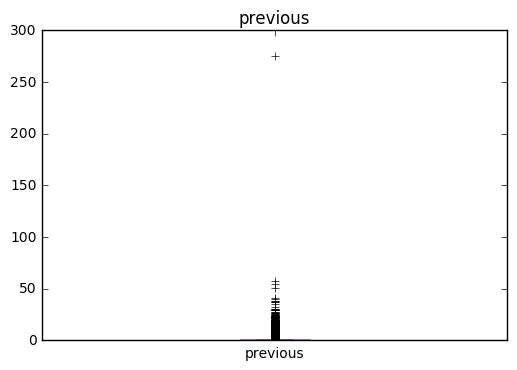

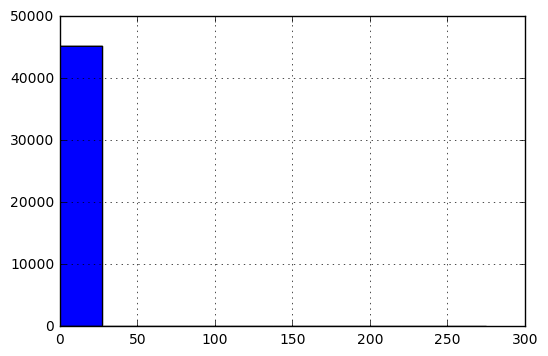

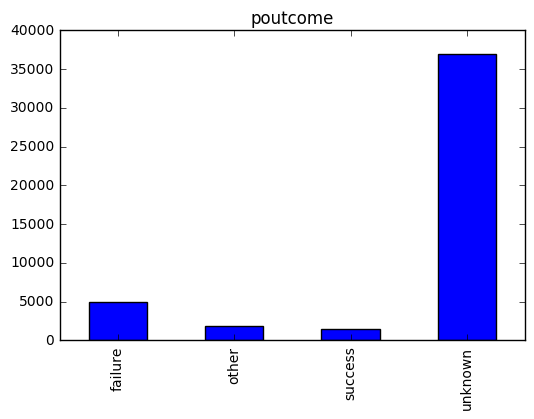

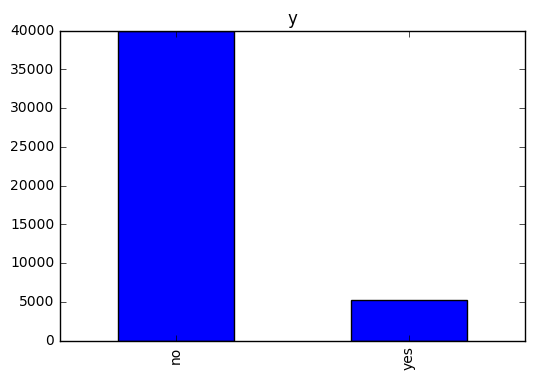

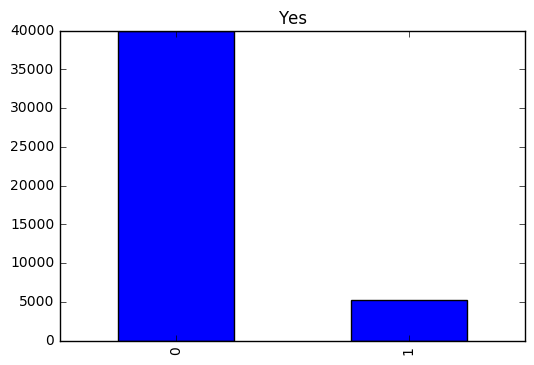

In [8]:
# Generate Correspondent Statistics Based on Column Type using for loop
# 
col = list()
for column in BankDs:
    col.append(column)
    
for i in range(len(col)):
    if BankDs[col[i]].dtype == np.int64:
        plt.title(col[i])
        BankDs[col[i]].plot(kind='box')
        plt.show()
        BankDs[col[i]].hist()
        plt.show()
    else:
        BankDs[col[i]].value_counts().sort_index().plot(kind='bar')
        plt.title(col[i])
        plt.show()


In [13]:
# descriptions
BankDs.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
# dataset groupby categorical variables
col = list()
for column in BankDs:
    col.append(column)

for i in range(len(col)):
    if BankDs[col[i]].dtype != np.int64:
        print (BankDs.groupby(col[i]).agg(['mean','count']))

                     age            balance              day        \
                    mean count         mean count       mean count   
job                                                                  
admin.         39.289886  5171  1135.838909  5171  15.564301  5171   
blue-collar    40.044081  9732  1078.826654  9732  15.442561  9732   
entrepreneur   42.190989  1487  1521.470074  1487  15.702085  1487   
housemaid      46.415323  1240  1392.395161  1240  16.002419  1240   
management     40.449567  9458  1763.616832  9458  16.114189  9458   
retired        61.626767  2264  1984.215106  2264  15.439488  2264   
self-employed  40.484484  1579  1647.970868  1579  16.027866  1579   
services       38.740250  4154   997.088108  4154  15.635532  4154   
student        26.542644   938  1388.060768   938  14.897655   938   
technician     39.314598  7597  1252.632092  7597  16.408582  7597   
unemployed     40.961627  1303  1521.745971  1303  15.498081  1303   
unknown        47.59

In [10]:
# Data Exploration by Yes
BankDs.groupby('Yes').mean()

,age,balance,day,duration,campaign,pdays,previous
Yes,,,,,,,
0,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
1,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


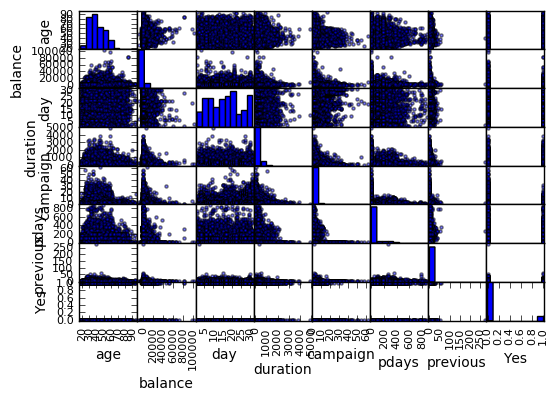

In [11]:
# Data Exploration by scatter matrix
scatter_matrix(BankDs)
plt.show()

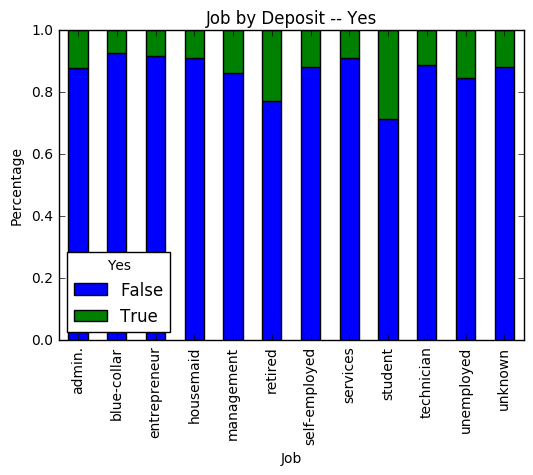

In [12]:
# Let's see job type by Deposite Yes
Yes_job_type = pd.crosstab(BankDs.job, BankDs.Yes.astype(bool))
Yes_job_type.div(Yes_job_type.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Job by Deposit -- Yes')
plt.xlabel('Job')
plt.ylabel('Percentage')

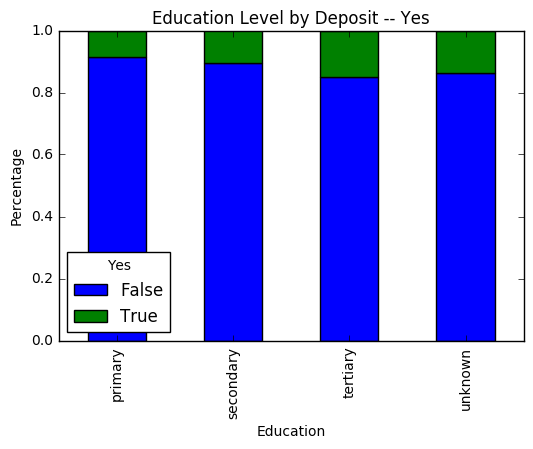

In [13]:
# Let's see education level by Deposite Yes
Yes_Ed_type = pd.crosstab(BankDs.education, BankDs.Yes.astype(bool))
Yes_Ed_type.div(Yes_Ed_type.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Education Level by Deposit -- Yes')
plt.xlabel('Education')
plt.ylabel('Percentage')

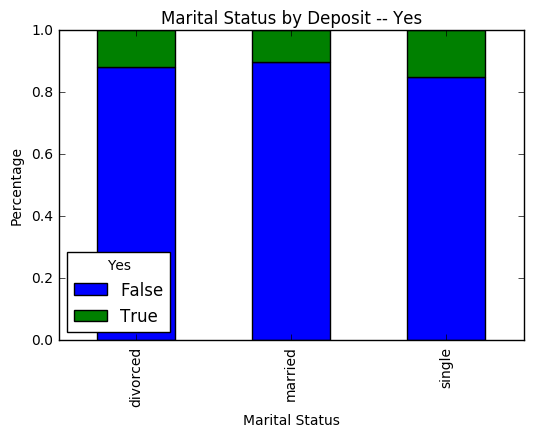

In [14]:
# Let's see marital status by Deposite Yes
Yes_Mari_type = pd.crosstab(BankDs.marital, BankDs.Yes.astype(bool))
Yes_Mari_type.div(Yes_Mari_type.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Marital Status by Deposit -- Yes')
plt.xlabel('Marital Status')
plt.ylabel('Percentage')

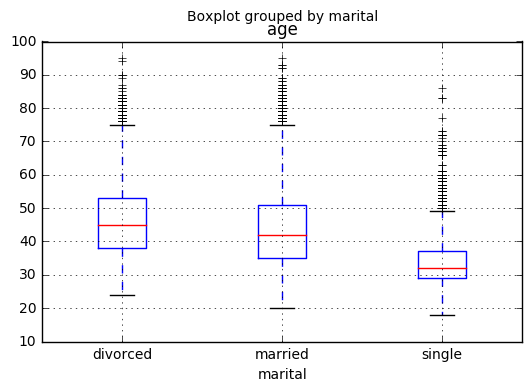

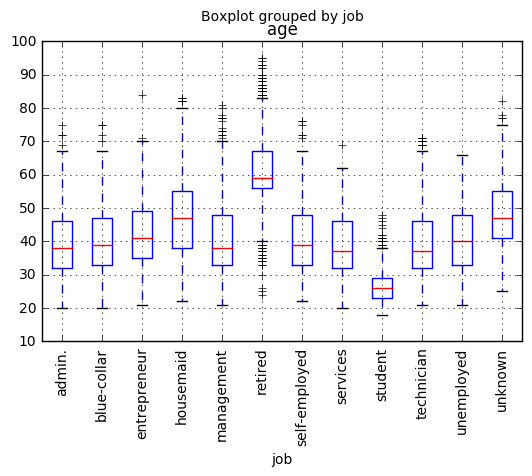

In [33]:
# Plotting Vertical Conditional age Boxplots
BankDs.boxplot('age','marital')
BankDs.boxplot('age','job', rot=90)

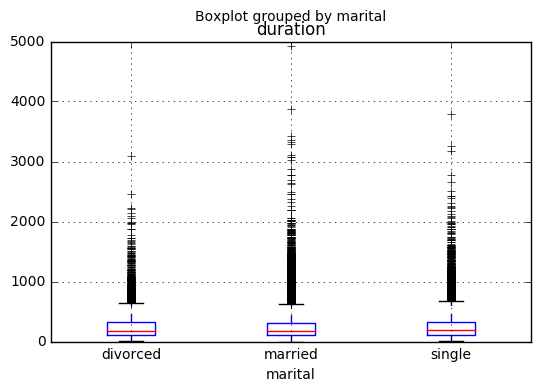

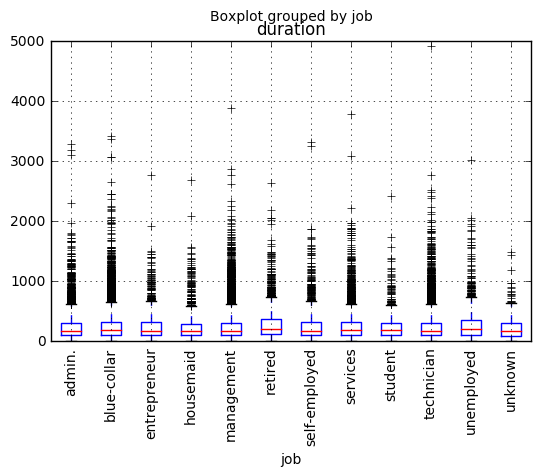

In [35]:
# Plotting Vertical Conditional duration Boxplots
BankDs.boxplot('duration','marital')
BankDs.boxplot('duration','job', rot=90)

In [15]:
# create dataframes with an intercept column and dummy variables 
y, X = dmatrices('Yes ~ age + job + marital + default + balance + housing + loan + \
                 contact + day + month + duration + campaign + pdays + previous + poutcome', BankDs, return_type="dataframe")
print (X.columns)

Index(['Intercept', 'job[T.blue-collar]', 'job[T.entrepreneur]',
       'job[T.housemaid]', 'job[T.management]', 'job[T.retired]',
       'job[T.self-employed]', 'job[T.services]', 'job[T.student]',
       'job[T.technician]', 'job[T.unemployed]', 'job[T.unknown]',
       'marital[T.married]', 'marital[T.single]', 'default[T.yes]',
       'housing[T.yes]', 'loan[T.yes]', 'contact[T.telephone]',
       'contact[T.unknown]', 'month[T.aug]', 'month[T.dec]', 'month[T.feb]',
       'month[T.jan]', 'month[T.jul]', 'month[T.jun]', 'month[T.mar]',
       'month[T.may]', 'month[T.nov]', 'month[T.oct]', 'month[T.sep]',
       'poutcome[T.other]', 'poutcome[T.success]', 'poutcome[T.unknown]',
       'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'],
      dtype='object')


In [16]:
# flatten y into a 1-D array
y = np.ravel(y)

In [17]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

0.90186016677357284

In [18]:
# what percentage of Yes?
y.mean()

0.11698480458295547

<I>11.7 % of the customers took the deposit offer </I>, which means that we could obtain 88.3 % accuracy by always predicting "no". So we're doing slightly better than the null error rate, but not by much.
Let's examine the coefficients to see what we learn.

In [19]:
# examine the coefficients
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

,0,1
0,Intercept,[-0.844827556395]
1,job[T.blue-collar],[-0.360799490357]
2,job[T.entrepreneur],[-0.260309461316]
3,job[T.housemaid],[-0.442610781306]
4,job[T.management],[-0.0108010985603]
5,job[T.retired],[0.365164682453]
6,job[T.self-employed],[-0.189998206282]
7,job[T.services],[-0.208012120505]
8,job[T.student],[0.381667928148]
9,job[T.technician],[-0.140389260786]


In [20]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
# predict class labels for the test set
predicted = model2.predict(X_test)
print (predicted)

[ 0.  1.  0. ...,  0.  0.  0.]


In [22]:
# generate class probabilities
probs = model2.predict_proba(X_test)
print (probs)

[[ 0.99385106  0.00614894]
 [ 0.19959213  0.80040787]
 [ 0.97788496  0.02211504]
 ..., 
 [ 0.99122444  0.00877556]
 [ 0.95762001  0.04237999]
 [ 0.93428329  0.06571671]]


In [23]:
# generate evaluation metrics
print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))

0.899587142436
0.898385091476


In [24]:
print (metrics.confusion_matrix(y_test, predicted))
print (metrics.classification_report(y_test, predicted))

[[11645   324]
 [ 1038   557]]
             precision    recall  f1-score   support

        0.0       0.92      0.97      0.94     11969
        1.0       0.63      0.35      0.45      1595

avg / total       0.88      0.90      0.89     13564



In [25]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print (scores)
print (scores.mean())

[ 0.88942946  0.90446705  0.8805574   0.87126742  0.89537713  0.87967264
  0.8407432   0.61844725  0.90223402  0.70929204]
0.839148759025


In [26]:
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, y)
print(fit.n_features_)
print(fit.support_)
print(fit.ranking_)

3
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False  True False False  True False False False False
 False False False False]
[ 5 20 27 15 24 16 33 29 11 31 23 21 18 26 22  6 14 17  4  8  3 13  7  9 25
  1 12 10  1  2 19  1 30 36 38 34 35 28 37 32]


In [27]:
# co-efficient ranking
model = model.fit(X, y)
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_),fit.ranking_)))

,0,1,2
0,Intercept,[-0.844827556395],5
1,job[T.blue-collar],[-0.360799490357],20
2,job[T.entrepreneur],[-0.260309461316],27
3,job[T.housemaid],[-0.442610781306],15
4,job[T.management],[-0.0108010985603],24
5,job[T.retired],[0.365164682453],16
6,job[T.self-employed],[-0.189998206282],33
7,job[T.services],[-0.208012120505],29
8,job[T.student],[0.381667928148],11
9,job[T.technician],[-0.140389260786],31
